<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3171 entries, 0 to 3170
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        3171 non-null   object 
 1   state          3171 non-null   object 
 2   city           3171 non-null   object 
 3   station        3171 non-null   object 
 4   last_update    3171 non-null   object 
 5   latitude       3171 non-null   float64
 6   longitude      3171 non-null   float64
 7   pollutant_id   3171 non-null   object 
 8   pollutant_min  2956 non-null   float64
 9   pollutant_max  2956 non-null   float64
 10  pollutant_avg  2956 non-null   float64
dtypes: float64(5), object(6)
memory usage: 272.6+ KB
None


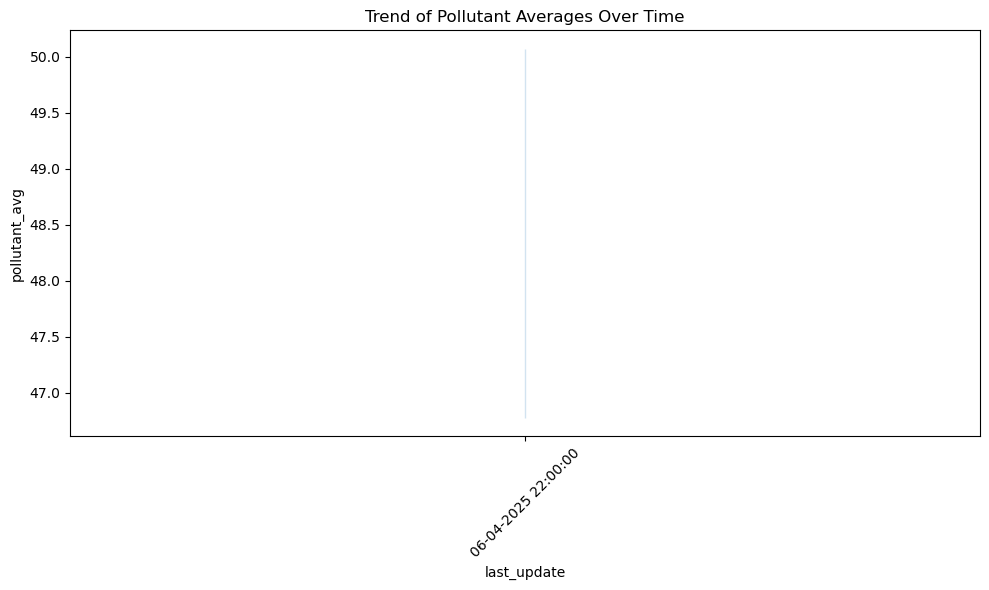

C:\Users\MANASWI\AppData\Local\Temp\ipykernel_12592\2541214115.py:39: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


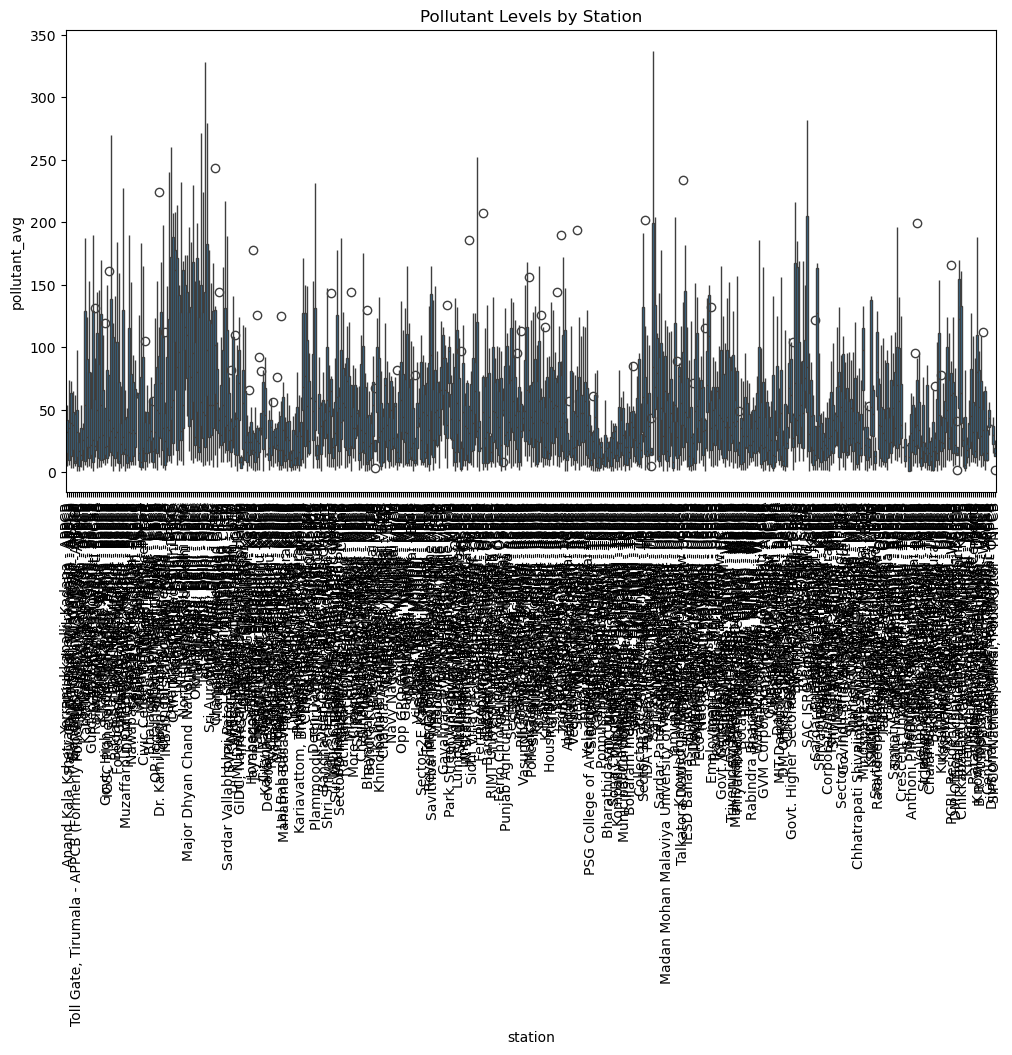

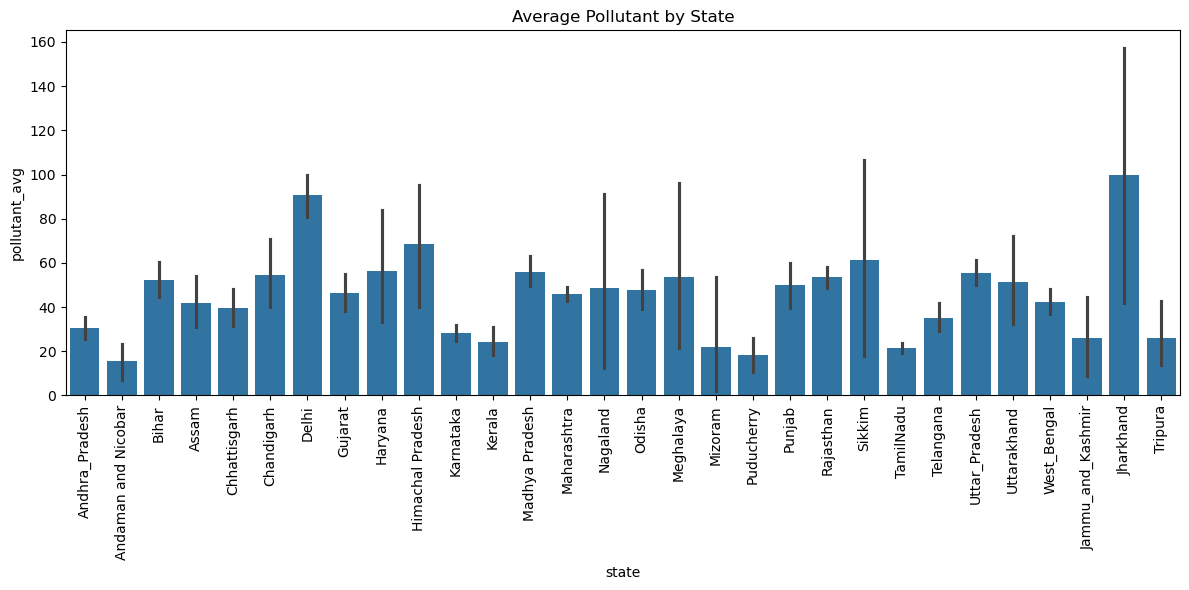

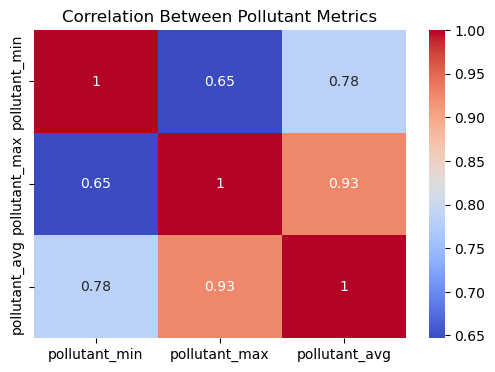

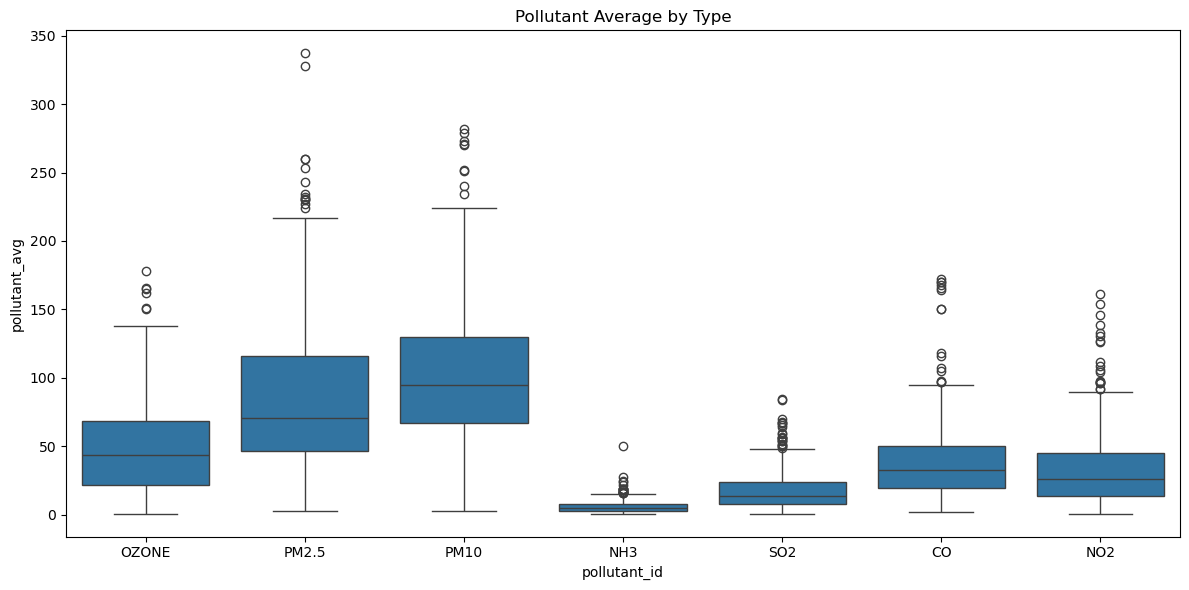

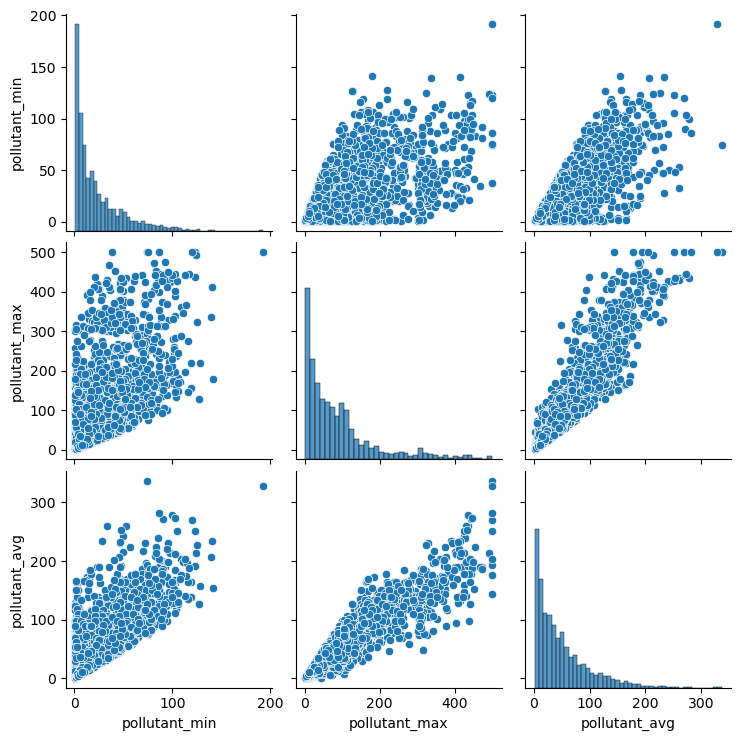

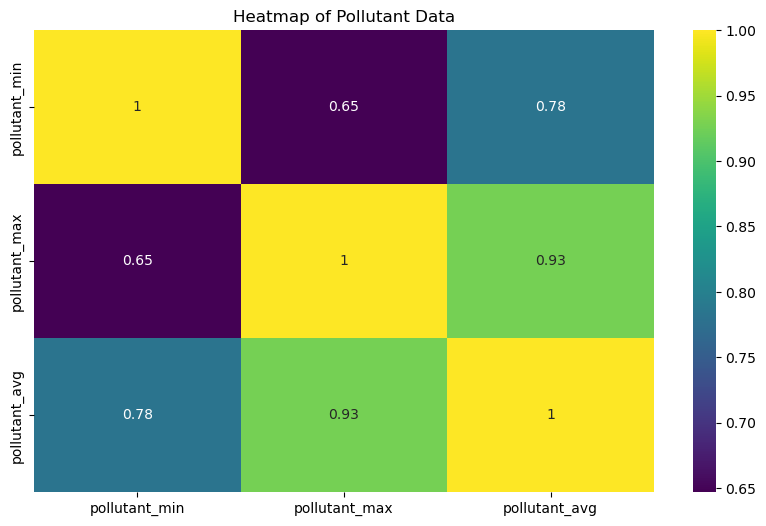

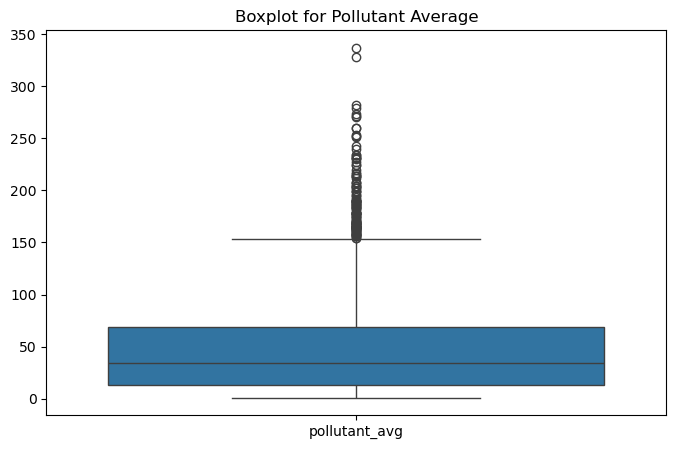

Total Records: 2956, Outliers Detected: 45


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Step 1: Import the dataset (with encoding fix)
file_path = ("C:\\Users\\MANASWI\\OneDrive\\Desktop\\ca2 ds\\Dataset.csv")
df = pd.read_csv(file_path, encoding='utf-8')

# Step 2: Get info
print(df.info())

# Step 3: Handle missing data
df.replace(" ", np.nan, inplace=True)
df.dropna(subset=['pollutant_min', 'pollutant_max', 'pollutant_avg'], inplace=True)

# Convert to numeric just in case
df['pollutant_min'] = pd.to_numeric(df['pollutant_min'], errors='coerce')
df['pollutant_max'] = pd.to_numeric(df['pollutant_max'], errors='coerce')
df['pollutant_avg'] = pd.to_numeric(df['pollutant_avg'], errors='coerce')
df.dropna(inplace=True)

# Step 4: Objectives

## Objective 1: Analyze Student Performance Trends (pollutant_avg over time)
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='last_update', y='pollutant_avg')
plt.xticks(rotation=45)
plt.title("Trend of Pollutant Averages Over Time")
plt.tight_layout()
plt.show()

## Objective 2: Evaluate Impact of Infrastructure (by Station)
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='station', y='pollutant_avg')
plt.xticks(rotation=90)
plt.title("Pollutant Levels by Station")
plt.tight_layout()
plt.show()

## Objective 3: Compare Performance Across States
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='state', y='pollutant_avg', estimator=np.mean)
plt.xticks(rotation=90)
plt.title("Average Pollutant by State")
plt.tight_layout()
plt.show()

## Objective 4: Key Predictors (correlation heatmap)
plt.figure(figsize=(6,4))
sns.heatmap(df[['pollutant_min', 'pollutant_max', 'pollutant_avg']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Pollutant Metrics")
plt.show()

## Objective 5: Track Type Disparities (by pollutant type)
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='pollutant_id', y='pollutant_avg')
plt.title("Pollutant Average by Type")
plt.tight_layout()
plt.show()

# Step 5: Relationship between variables - Pairplot
sns.pairplot(df[['pollutant_min', 'pollutant_max', 'pollutant_avg']])
plt.show()

# Step 6: Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[['pollutant_min', 'pollutant_max', 'pollutant_avg']].corr(), annot=True, cmap='viridis')
plt.title("Heatmap of Pollutant Data")
plt.show()

# Step 7: Outliers

## Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(data=df[['pollutant_avg']])
plt.title("Boxplot for Pollutant Average")
plt.show()

## Z-score
z_scores = zscore(df[['pollutant_avg']])
outliers = df[(np.abs(z_scores) > 3).any(axis=1)]
print(f"Total Records: {df.shape[0]}, Outliers Detected: {outliers.shape[0]}")